In [1]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import pandas as pd

In [2]:
middle_east = gpd.read_file("middle-east.geo.json")

In [3]:
middle_east.head()

,continent,country-abbrev,geometry,hc-a2,hc-group,hc-key,hc-middle-x,hc-middle-y,id,iso-a2,iso-a3,labelrank,name,region-wb,subregion,woe-id
0,Asia,Saud.,"(POLYGON ((3825 2092, 3877 2080, 3916 2050, 38...",SA,admin0,sa,0.45,0.49,SA,SA,SAU,2,Saudi Arabia,Middle East & North Africa,Western Asia,23424938
1,Asia,Bahr.,"POLYGON ((6245 4841, 6284 4824, 6269 4705, 623...",BH,admin0,bh,0.45,0.50,BH,BH,BHR,4,Bahrain,Middle East & North Africa,Western Asia,23424753
2,Asia,Tur.,"(POLYGON ((-641 9203, -696 9183, -725 9193, -6...",TR,admin0,tr,0.38,0.49,TR,TR,TUR,2,Turkey,Europe & Central Asia,Western Asia,23424969
3,Asia,Oman,"(POLYGON ((8540 3050, 8537 3104, 8576 3137, 86...",OM,admin0,om,0.60,0.51,OM,OM,OMN,4,Oman,Middle East & North Africa,Western Asia,23424898
4,Asia,Iran,"(POLYGON ((4640 8219, 4650 8268, 4584 8317, 45...",IR,admin0,ir,0.52,0.52,IR,IR,IRN,2,Iran,Middle East & North Africa,Southern Asia,23424851


In [4]:
%matplotlib inline

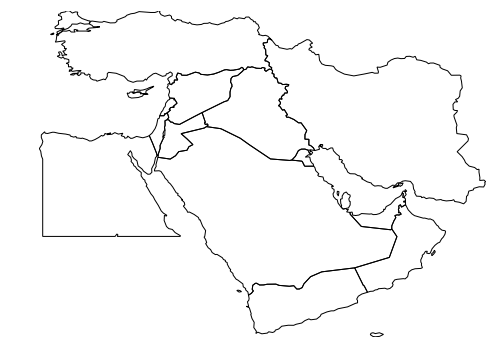

In [5]:
gplt.polyplot(middle_east)

In [6]:
middle_east = middle_east[~middle_east['name'].isin(['Cyprus', 'Northern Cyprus', 'Turkey', 'Israel'])]

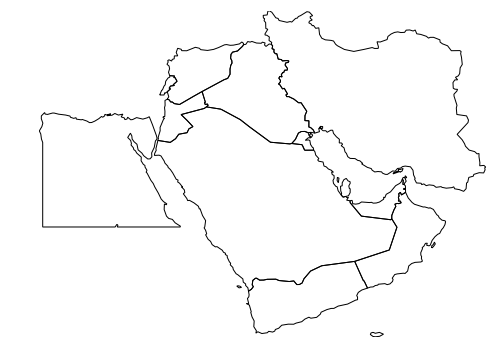

In [7]:
gplt.polyplot(middle_east)

A technical definition for data tiers follows.

A country is in data **tier 1** if it has a government services portal and/or a statistical authority website online, but that portal or website only provides information in Arabic. Because English-language translations are, for whatever  reason, almost the first "advanced" feature the website of a relatively better-off country in the region acquires, these portals do not as a rule publish any data.

A country is in data **tier 2** if it has a government services portal and/or a statistical authority website online, and one of those websites provides language in an English mirror translation. At the time of observation, such countries always publish *some* data&mdash;at a minimum, usually some population estimates and weather reports&mdash;even if the data they publish is almost certainly of exceedingly limited volume and usefulness.

A country is in data **tier 3** if it has a government services portal and/or a statistical authority website online, one or both of these portals provides an English mirror translation, and at least one provides a central landing page or portal with datasets published by the state.

In [8]:
tiers = {
    'Saudi Arabia': 2,
    'Bahrain': 3,
    'Oman': 3,
    'Iran': 2,
    'Yemen': 1,
    'Kuwait': 3,
    'Egypt': 3,
    'Jordan': 2,
    'Iraq': 1,  # Iraq's stat auth has English copy, but it's utterly broken: http://cosit.gov.iq/en/home
    'Qatar': 3,
    'United Arab Emirates': 3,
    'Syria': 2,
    'Lebanon': 2,
}

In [11]:
middle_east['Publishes Data'] = [value if value != 2 else 1 for value in tiers.values()]

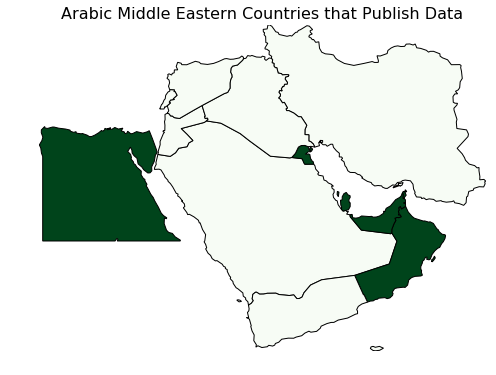

In [12]:
ax = gplt.choropleth(middle_east, hue='Publishes Data', cmap='Greens')
ax.set_title("Arabic Middle Eastern Countries that Publish Data", fontsize=16)

In [18]:
middle_east['Open Data Tier'] = tiers.values()

In [28]:
gplt.choropleth?

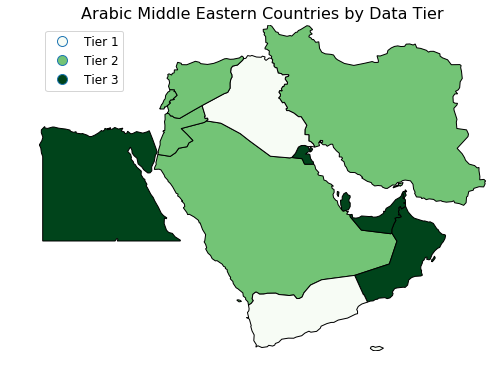

In [35]:
ax = gplt.choropleth(middle_east, 
                     hue='Open Data Tier', 
                     cmap='Greens', 
                     categorical=True,
                     legend=True,
                     legend_labels=['Tier 1', 'Tier 2', 'Tier 3'],
                     legend_kwargs={'fontsize': 12})
ax.set_title("Arabic Middle Eastern Countries by Data Tier", fontsize=16)

As a table:

Saudi Arabia&mdash;Tier 2

Bahrain&mdash;Tier 3

Oman&mdash;Tier 3

Iran&mdash;Tier 2

Yemen&mdash;Tier 1

Kuwait&mdash;Tier 3

Egypt&mdash;Tier 3

Jordan&mdash;Tier 2

Iraq&mdash;Tier 1

Qatar&mdash;Tier 3

United Arab Emirates&mdash;Tier 3

Syria&mdash;Tier 2

Lebanon&mdash;Tier 2